In [1]:
# Import libraries
import earthpy # Manage local data
import pandas as pd # Work with vector format data
# Advanced options on matplotlib/seaborn/pandas plots
import matplotlib.pyplot as plt
# Common statistical plots for tabular data
import seaborn as sns
# Fit an OLS linear regression
from sklearn.linear_model import LinearRegression
# Addition for OLS Linear Regression
import numpy as np

In [2]:
# Format URL for data recovery (Tucson, AZ - https://www.ncdc.noaa.gov/cdo-web/datasets/GHCND/stations/GHCND:USW00023160/detail)
tuc_url = ('https://www.ncei.noaa.gov/access/services/da'
'ta/v1?dataset=daily-summaries&dataTypes=TOBS&stations=USC00028795&startDate=1982-05-01&endDate=2025-09-19&units=standard')
tuc_url

'https://www.ncei.noaa.gov/access/services/data/v1?dataset=daily-summaries&dataTypes=TOBS&stations=USC00028795&startDate=1982-05-01&endDate=2025-09-19&units=standard'

In [3]:
# Download the climate data
tuc_climate_df = pd.read_csv(
    tuc_url,
    index_col='DATE',
    parse_dates=True,
    na_values=['NaN']
)

# Check that the download worked
tuc_climate_df.head()

,STATION,TOBS
DATE,,
1982-05-01,USC00028795,67.0
1982-05-02,USC00028795,85.0
1982-05-03,USC00028795,90.0
1982-05-04,USC00028795,72.0
1982-05-06,USC00028795,80.0


In [4]:
# Save the climate data
tuc_climate_df.to_csv('tucson_temp_data.csv')

In [5]:
tuc_climate_df

,STATION,TOBS
DATE,,
1982-05-01,USC00028795,67.0
1982-05-02,USC00028795,85.0
1982-05-03,USC00028795,90.0
1982-05-04,USC00028795,72.0
1982-05-06,USC00028795,80.0
...,...,...
2025-09-12,USC00028795,83.0
2025-09-13,USC00028795,78.0
2025-09-14,USC00028795,81.0


<Axes: ylabel='Frequency'>

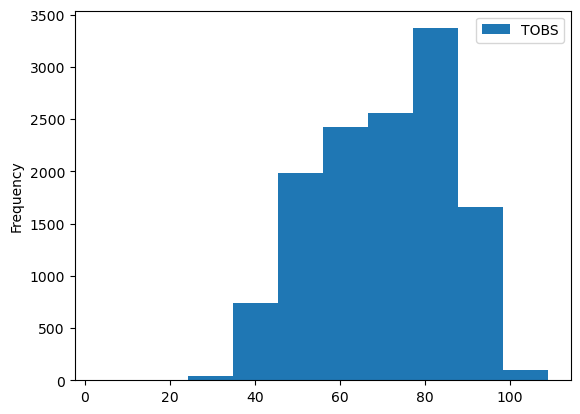

In [6]:
# Take a look at the contents of the dataframe
tuc_climate_df.plot.hist()

In [7]:
# Remove station column from dataframe
tucson_climate_df = tuc_climate_df[["TOBS"]]
tucson_climate_df

,TOBS
DATE,
1982-05-01,67.0
1982-05-02,85.0
1982-05-03,90.0
1982-05-04,72.0
1982-05-06,80.0
...,...
2025-09-12,83.0
2025-09-13,78.0
2025-09-14,81.0


In [8]:
# Rename the temperature column to reflect the unit of measure
tucson_climate_df_units = tucson_climate_df.rename(columns={
    'TOBS': 'temp_f',
})

tucson_climate_df_units

,temp_f
DATE,
1982-05-01,67.0
1982-05-02,85.0
1982-05-03,90.0
1982-05-04,72.0
1982-05-06,80.0
...,...
2025-09-12,83.0
2025-09-13,78.0
2025-09-14,81.0


In [9]:
# Add a column converting the temperature data to degrees Celsius
tucson_climate_df_units['temp_c'] = (tucson_climate_df_units['temp_f'] - 32) * 5 / 9 
tucson_climate_df_units

,temp_f,temp_c
DATE,,
1982-05-01,67.0,19.444444
1982-05-02,85.0,29.444444
1982-05-03,90.0,32.222222
1982-05-04,72.0,22.222222
1982-05-06,80.0,26.666667
...,...,...
2025-09-12,83.0,28.333333
2025-09-13,78.0,25.555556
2025-09-14,81.0,27.222222


<Axes: xlabel='DATE'>

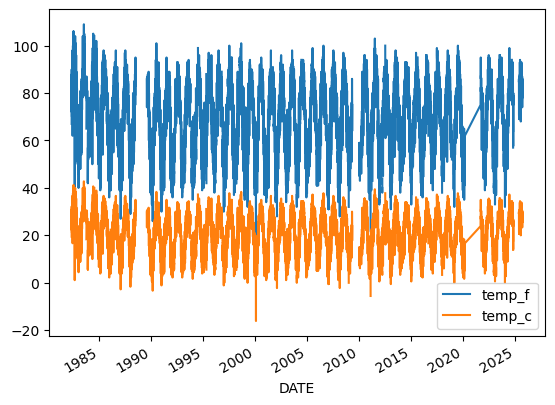

In [10]:
tucson_climate_df_units.plot()

<Axes: title={'center': 'Daily Temperature in Tucson AZ'}, xlabel='Year', ylabel='Temperature (degrees C)'>

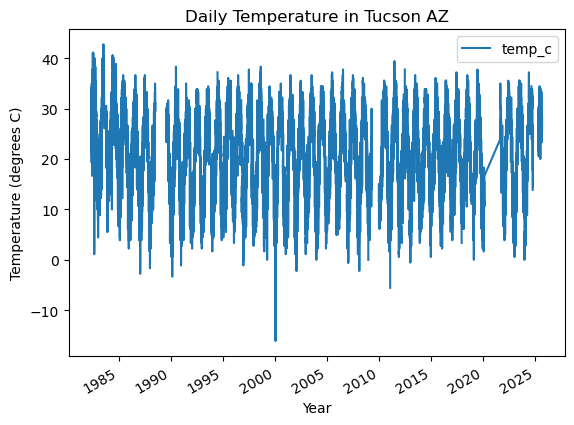

In [11]:
# Plot all the data
tucson_climate_df_units.plot(
    y='temp_c',
    title='Daily Temperature in Tucson AZ',
    xlabel='Year',
    ylabel='Temperature (degrees C)'
)

In [12]:
# Downsample the data to replot
tucson_ann_climate_df = (
    tucson_climate_df_units
    .resample('YE')  # 'YE' = year-end frequency
    .mean()
)
tucson_ann_climate_df

,temp_f,temp_c
DATE,,
1982-12-31,82.213992,27.896662
1983-12-31,75.721088,24.289494
1984-12-31,78.898204,26.054558
1985-12-31,73.540845,23.078247
1986-12-31,69.418994,20.788330
1987-12-31,68.337912,20.187729
1988-12-31,65.226519,18.459177
1989-12-31,69.143750,20.635417
1990-12-31,67.002809,19.446005


<Axes: title={'center': 'Annual Average Temperature in Tucson AZ'}, xlabel='Year', ylabel='Temperature (degrees C)'>

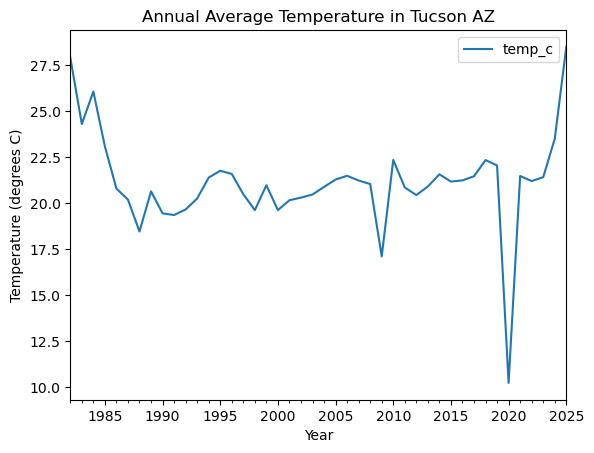

In [13]:
# Replot the annual data
tucson_ann_climate_df.plot(
    y='temp_c',
    title='Annual Average Temperature in Tucson AZ',
    xlabel='Year',
    ylabel='Temperature (degrees C)'
)

In [14]:
# Make an interactive plot
import hvplot.pandas

tucson_interactive = tucson_ann_climate_df.hvplot(
    y='temp_c',
    title='Annual Average Temperature in Tucson AZ'
).opts(
    xlabel='Year',
    ylabel='Temperature (degrees C)'
)
tucson_interactive

:Curve   [DATE]   (temp_c)

In [15]:
import holoviews as hv

hv.save(tucson_interactive, 'tucson_climate.html')

In [16]:
# Fit an OLS Linear Regression to the data
# Copy your annual climate DataFrame
df = tucson_ann_climate_df.copy().reset_index(drop=True)

# Build a Year column (data start is 1982)
df['Year'] = np.arange(1982, 1982 + len(df))

# Keep only rows from 1968 and later
# df = df[df['Year'] >= 1968]

# Exclude a specific year 
# exclude_year = 1994          
# df = df[df['Year'] != exclude_year]

# Map Temperature to the correct column
df['Temperature'] = df['temp_c']

# Prepare arrays for scikit-learn
X = df[['Year']].values
y = df['Temperature'].values

# Fit the regression
model = LinearRegression()
model.fit(X, y)

# Get slope and R²
slope = model.coef_[0]
r_squared = model.score(X, y)

print(f"Slope (°C per year): {slope}")
print(f"R²: {r_squared:.4f}")


Slope (°C per year): -0.01856413514533616
R²: 0.0079


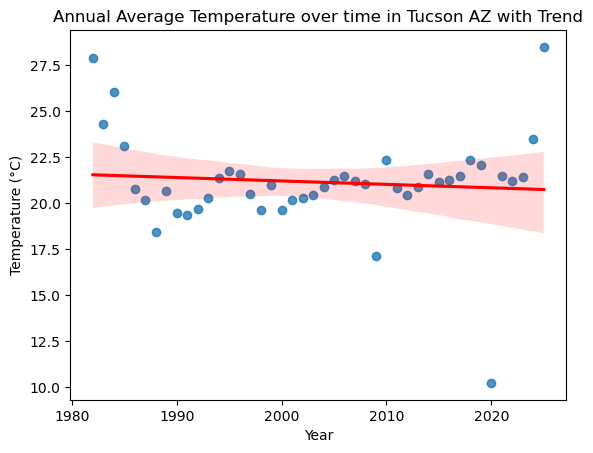

In [17]:
# Plot annual average temperature with a trend line
ax = sns.regplot(
    x='Year',
    y='temp_c',
    data=df,
    line_kws={'color': 'red'}  # color for the trend line
)

ax.set(
    title='Annual Average Temperature over time in Tucson AZ with Trend',
    xlabel='Year',
    ylabel='Temperature (°C)'
)

plt.show()

### Tucson Has Warmed ~X °C per Decade Since X

A linear OLS regression shows an average warming rate of **X °C per year** (≈ **X °C per decade**). While the R² value is low (**X**), indicating that year-to-year variability is large, the overall trend suggests a gradual rise in Tucson’s annual average temperature since the mid-20th century.